# Load Data(04-2015 - 03-2020)

In [56]:
import numpy as np
import pickle


with open('monthly_prevs/monthly_prev_dict.pickle', 'rb') as handle:
    prev_dict = pickle.load(handle)
    
ho_list = []
for kv in prev_dict["HO-00-00-00-00"].items():
    ho_list.append((kv[0],np.round(kv[1],4)))
    
seasonal_list = ho_list[50:]

print(seasonal_list)
print()

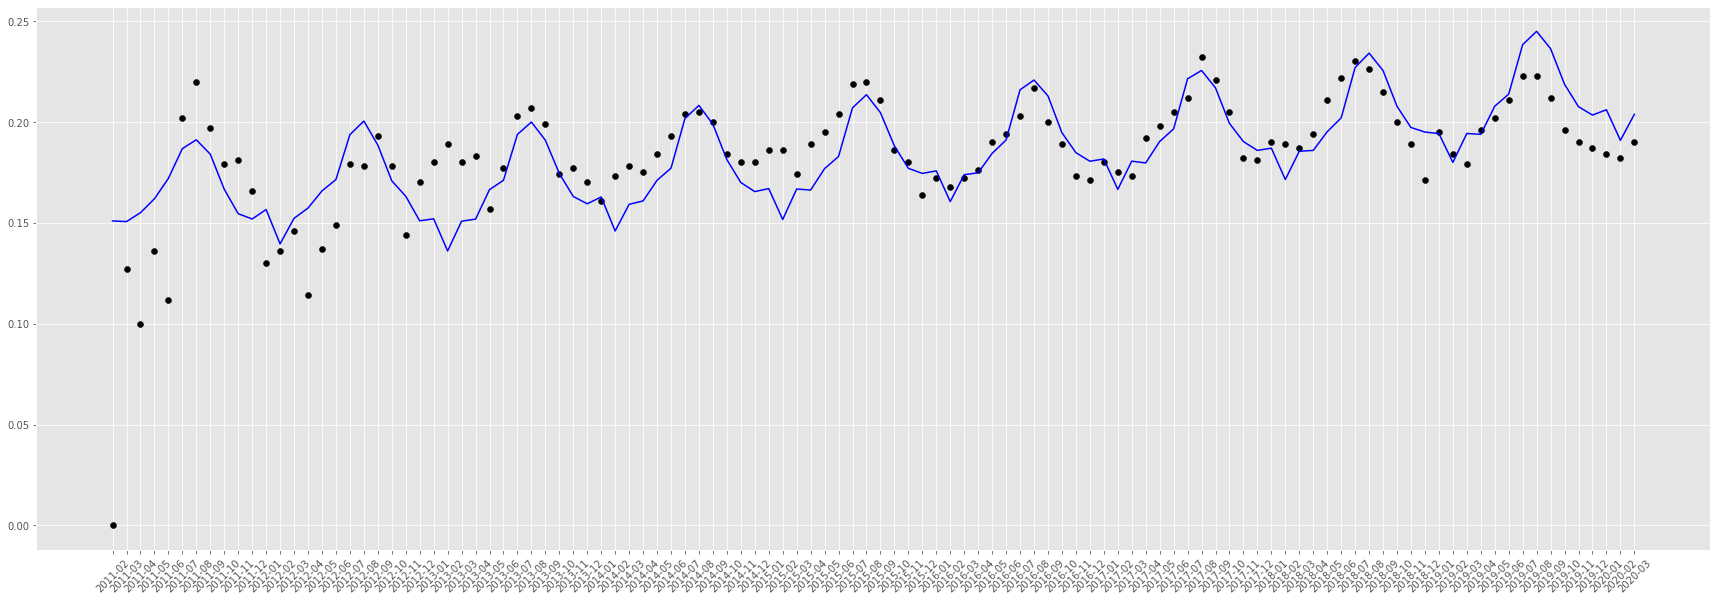

Y:  [0.0, 0.127, 0.1, 0.136, 0.112, 0.202, 0.22, 0.197, 0.179, 0.181, 0.166, 0.13, 0.136, 0.146, 0.114, 0.137, 0.149, 0.179, 0.178, 0.193, 0.178, 0.144, 0.17, 0.18, 0.189, 0.18, 0.183, 0.157, 0.177, 0.203, 0.207, 0.199, 0.174, 0.177, 0.17, 0.161, 0.173, 0.178, 0.175, 0.184, 0.193, 0.204, 0.205, 0.2, 0.184, 0.18, 0.18, 0.186, 0.186, 0.174, 0.189, 0.195, 0.204, 0.219, 0.22, 0.211, 0.186, 0.18, 0.164, 0.172, 0.168, 0.172, 0.176, 0.19, 0.194, 0.203, 0.217, 0.2, 0.189, 0.173, 0.171, 0.18, 0.175, 0.173, 0.192, 0.198, 0.205, 0.212, 0.232, 0.221, 0.205, 0.182, 0.181, 0.19, 0.189, 0.187, 0.194, 0.211, 0.222, 0.23, 0.226, 0.215, 0.2, 0.189, 0.171, 0.195, 0.184, 0.179, 0.196, 0.202, 0.211, 0.223, 0.223, 0.212, 0.196, 0.19, 0.187, 0.184, 0.182, 0.19]
Y_pred:  [0.151  0.1506 0.155  0.1619 0.172  0.1868 0.1912 0.184  0.1667 0.1545
 0.1519 0.1566 0.1396 0.1522 0.1573 0.1658 0.1714 0.1937 0.2004 0.1886
 0.1708 0.1632 0.151  0.152  0.1361 0.1508 0.1518 0.1665 0.1711 0.1938
 0.2    0.191  0.1745 0.1631 

In [57]:
'''
Linear Regression with Seasonality
y_1 ... y_t: the prevalence for each timestep
x_1 ... x_t: vector representation of input for each timestep
beta_t ... Learned parameter

y_t = eps + b_0 + C_t + beta_
beta_t = [C, b_1, b_2, b_3, ... b_12, eps, b_0]
m = (t % 12) + 3 // The first month is April
x_t = [t, (m==1), (m==2), ..., (m==12), 1, 1]
y_t = beta' * x_t

'''

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import sys
from sklearn.model_selection import KFold



# Prepare X

X_train = []
Y_train = []

X_test = []
Y_test = []

#X_label = range(1,61)
X_label = []



t = 1 
for f,s in ho_list:
    month = int(f[5:])
    temp = [0] * 15
    temp[0] = t  
    temp[month] = 1
    temp[13] = 1 # B_0
    temp[14] = 1 # eps
    X_label.append(f)
    X_train.append(temp)
    Y_train.append(s)
    t += 1


'''
for elem in X_test:
    print(elem)

for elem in Y_test:
    print(elem)
'''

# Create linear regression object
model = linear_model.LinearRegression()

kfold = KFold(n_splits=10)
X = X_train + X_test
Y = Y_train + Y_test
Y_pred = [0] * len(Y)
for train_index, test_index in kfold.split(X, Y):
#    print(train_index)
    X_train = []
    X_test = []
    Y_train = []
    Y_test = []
    for i in train_index:
        X_train.append(X[i])
        Y_train.append(Y[i])
    for j in test_index:
        X_test.append(X[j])
        Y_test.append(Y[j])
 
#    X_train, X_test = X[train_index], X[test_index] 
#    Y_train, Y_test = Y[train_index], Y[test_index] 

    model.fit(X_train, Y_train)
    out = model.predict(X_test)
    i = 0
    for x in test_index:
        Y_pred[x] = out[i]
        i += 1

        




plt.figure(figsize=(30,10))
# Plot outputs

plt.scatter(X_label, Y,  color='black')
plt.plot(X_label, Y_pred, color='blue')
plt.xticks(rotation=45)
plt.show()

print("Y: ", Y)
print("Y_pred: ", np.round(Y_pred,4))


In [55]:
# The coefficients
print('Coefficients: \n', model.coef_)
# The mean absolute error
print('Mean squared error: %.10f'
      % mean_absolute_error(Y, Y_pred))

'''
my_sum = 0
for i in range(len(Y)):
    diff = Y[i] - Y_pred[i]
    my_sum += abs(diff)
print(my_sum / len(Y))
sys.exit()
'''

# The mean squared error
print('Mean squared error: %.10f'
      % mean_squared_error(Y, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y, Y_pred))


Coefficients: 
 [ 0.00030231 -0.01068032 -0.01623264 -0.01778495 -0.00462338  0.00487431
  0.01257199  0.02246968  0.02836736  0.01626505  0.00097662 -0.01332569
 -0.02287801  0.          0.        ]
Mean squared error: 0.0065392593
Mean squared error: 0.0000587545
Coefficient of determination: 0.80
